In [1]:
import pandas as pd
import numpy as np
import os 
import math

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib as mpl
import seaborn as sns 

In [2]:
plot_params = {
    'font.family': 'Ubuntu',
    'font.weight': 'light',
    
    'figure.figsize': (5,5),
    'figure.frameon': False, 
    'figure.titlesize': 'xx-large',
    'figure.titleweight': 'normal',
    
    'axes.titlesize': 'large',
    'axes.titlecolor': 'black',
    'axes.titleweight': 'normal',
    'axes.titlelocation': 'center',
    'axes.labelsize': 'x-large',
    
    'grid.alpha': .25, 
    'legend.frameon':False,
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
}

pylab.rcParams.update(plot_params)
sns.set_palette('mako')

In [3]:
data_folder = 'data'
train_data_fname = 'train.csv'
test_data_fname = 'test.csv'
external_data_fname = 'external_data.csv'
sample_submission_fname = 'sample_submission.csv'



In [4]:
train_data_path = os.path.join(data_folder, train_data_fname)
test_data_path = os.path.join(data_folder, test_data_fname)
external_data_path = os.path.join(data_folder, external_data_fname)
sample_data_path = os.path.join(data_folder, sample_submission_fname)

In [5]:
!ls

data  eda.ipynb


In [6]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
external_data = pd.read_csv(external_data_path)
sample_data = pd.read_csv(sample_data_path)

In [7]:
print(train_data.shape)
train_data.head(5)

(414, 8)


,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [8]:
print(test_data.shape)
test_data.head(5)

(276, 7)


,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [9]:
print(external_data.shape)
external_data.head(5)

(79, 7)


,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [10]:
sample_data.shape

(276, 2)

In [11]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,414.0,206.500000,119.655756,0.000,103.250,206.500,309.750,413.00
gravity,414.0,1.017894,0.006675,1.005,1.012,1.018,1.022,1.04
ph,414.0,5.955459,0.642260,4.760,5.530,5.740,6.280,7.94
osmo,414.0,651.545894,234.676567,187.000,455.250,679.500,840.000,1236.00
cond,414.0,21.437923,7.514750,5.100,15.500,22.200,27.600,38.00
urea,414.0,278.657005,136.442249,10.000,170.000,277.000,385.000,620.00
calc,414.0,4.114638,3.217641,0.170,1.450,3.130,6.630,14.34
target,414.0,0.444444,0.497505,0.000,0.000,0.000,1.000,1.00


In [12]:
train_data.duplicated().value_counts()

False    414
dtype: int64

In [13]:
train_data.nunique()

id         414
gravity     28
ph          71
osmo        80
cond        65
urea        73
calc        85
target       2
dtype: int64

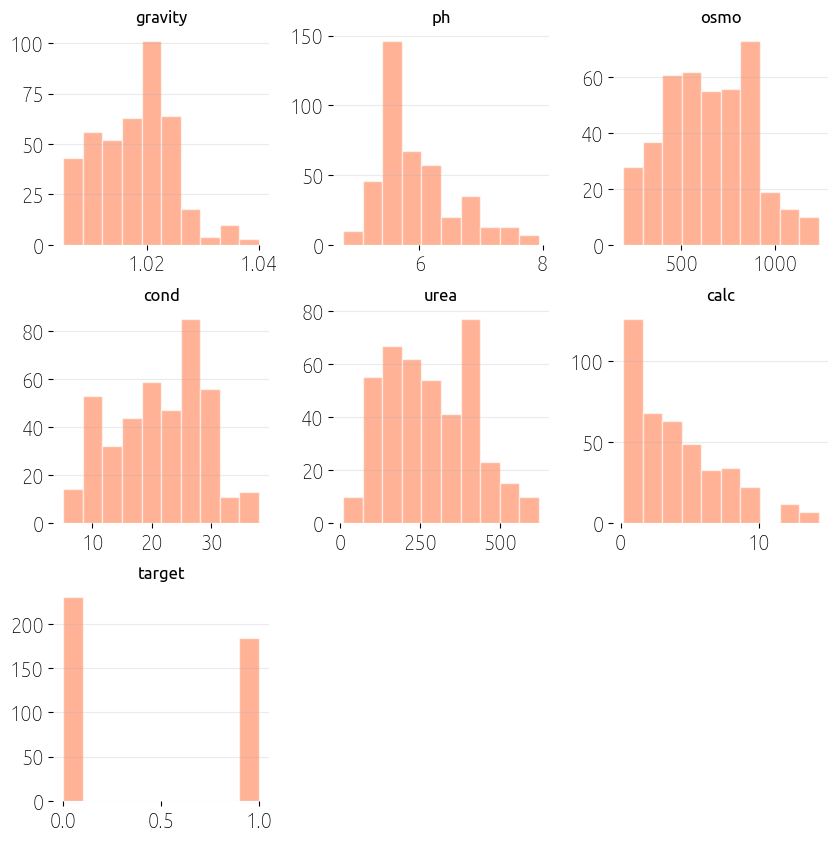

In [14]:
axs_train = train_data.drop('id', axis=1).hist(figsize = (10,10), linewidth = 1, edgecolor = 'white', alpha = .6, color = 'coral')
for ax in axs_train.flatten():
    ax.set_frame_on(False)
    ax.grid(axis='x')
plt.show()

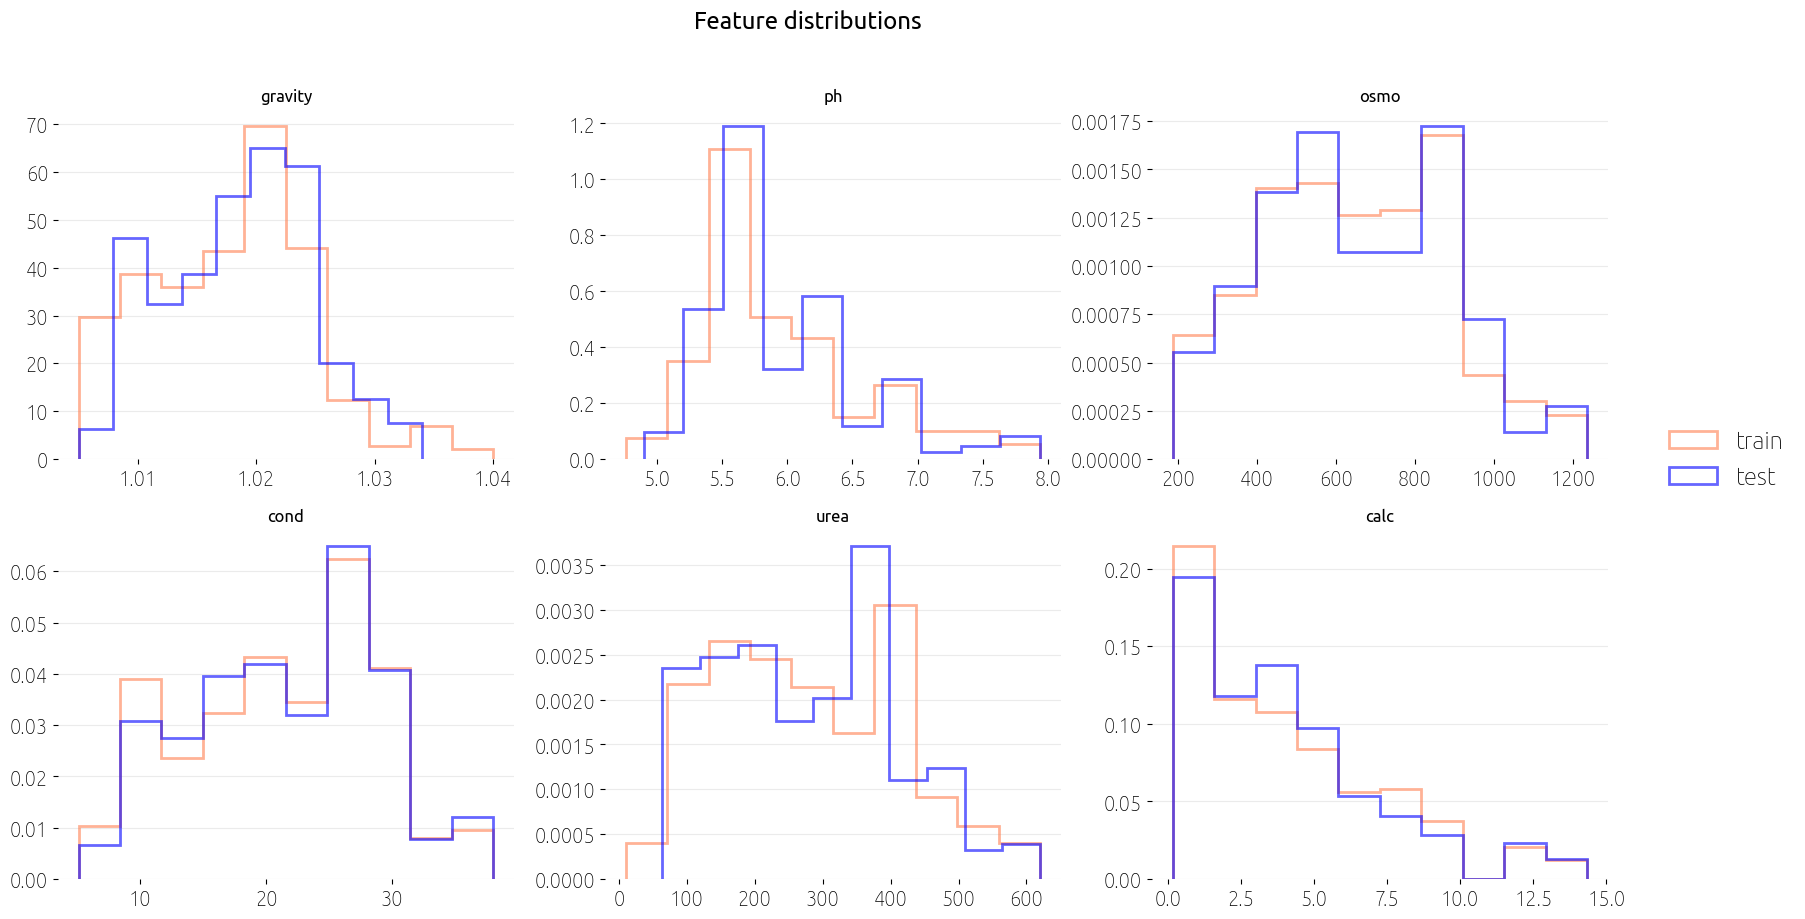

In [15]:
fig, axs = plt.subplots(nrows=2, ncols = 3, figsize = (20,10))

# axs[-1,-1].axis('off')
# axs[-1,-2].axis('off')

axs = axs.flatten()

for ax, column in zip(axs, train_data.drop(['id','target'], axis = 1).columns.to_list()):
    ax.hist(train_data[column],  linewidth = 2, alpha = .6, color = 'coral', density=True, histtype='step', label = 'train')

    ax.hist(test_data[column],  linewidth = 2, alpha = .6, color = 'blue', density=True, histtype='step', label = 'test')

    # ax.hist(external_data[column],  linewidth = 2, alpha = .6, color = 'green', density=True, histtype='step', label = 'external')
    if column: 
        ax.set_title(column)
    ax.grid(axis = 'y')
    ax.set_frame_on(False)
plt.suptitle('Feature distributions')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc = 'center right', fontsize = 'xx-large')
plt.show()

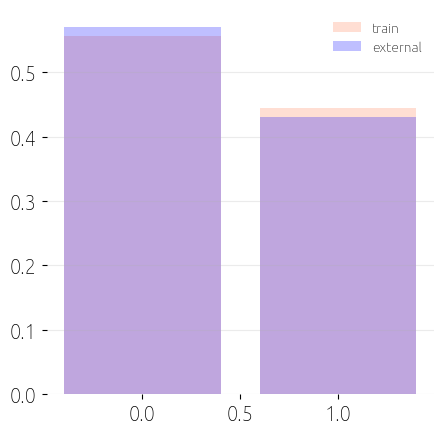

In [16]:
fig = plt.figure()
subset_train = train_data['target'].value_counts() / train_data.__len__()

subset_external = external_data['target'].value_counts() / external_data.__len__()
plt.bar(subset_train.index, subset_train.values, linewidth = 2, alpha = .25, color = 'coral',  label = 'train')
plt.bar(subset_external.index, subset_external.values, linewidth = 2, alpha = .25, color = 'blue',  label = 'external')
plt.legend()
plt.box(False)
plt.grid(.25, axis = 'y')
